# Pneumonia Prediction

In [4]:
import numpy as np
import sklearn as sk
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from time import time
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, RobustScaler

import warnings
warnings.filterwarnings("ignore") 

## Part 1: Load Data

In [199]:
df = pd.read_csv("data/train.csv", index_col=0)

In [345]:
df

,MO HLADR+ MFI (cells/ul),Neu CD64+MFI (cells/ul),CD3+T (cells/ul),CD8+T (cells/ul),CD4+T (cells/ul),NK (cells/ul),CD19+ (cells/ul),CD45+ (cells/ul),Age,Sex 0M1F,Mono CD64+MFI (cells/ul),label
id,,,,,,,,,,,,
0,3556.0,2489.0,265.19,77.53,176.55,0.00,4.20,307.91,52,0,7515.0,1
1,1906.0,134.0,1442.61,551.90,876.07,112.10,168.15,1735.48,20,1,1756.0,0
2,1586.0,71.0,1332.74,684.20,655.26,244.95,216.52,1820.04,28,1,1311.0,0
3,683.0,94.0,419.23,255.80,162.17,72.05,44.68,538.22,55,1,1443.0,0
4,1032.0,71.0,1102.72,480.27,625.30,188.78,130.77,1427.97,28,1,1542.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
82,626.0,68.0,1771.57,666.99,1117.48,360.21,118.84,2306.82,42,1,1521.0,0
83,1237.0,71.0,1348.53,428.09,924.69,120.02,48.67,1524.78,56,0,1345.0,0
84,634.0,1002.0,1300.00,558.00,724.00,67.00,105.00,1484.26,34,0,2926.0,1


In [332]:
# special cases
df[(df["Neu CD64+MFI (cells/ul)"] > 80) & (df["Neu CD64+MFI (cells/ul)"] < 150) & (df["CD3+T (cells/ul)"] > 900) & (df["NK (cells/ul)"] < 400) & (df["CD19+ (cells/ul)"] < 150) & (df["Mono CD64+MFI (cells/ul)"] < 1900)]


,MO HLADR+ MFI (cells/ul),Neu CD64+MFI (cells/ul),CD3+T (cells/ul),CD8+T (cells/ul),CD4+T (cells/ul),NK (cells/ul),CD19+ (cells/ul),CD45+ (cells/ul),Age,Sex 0M1F,Mono CD64+MFI (cells/ul),label
id,,,,,,,,,,,,
5,495.0,143.0,1719.32,885.94,842.94,271.42,119.46,2143.66,42,1,1827.0,1
17,751.0,147.0,980.73,418.43,558.83,280.80,129.28,1400.25,27,0,814.0,1
26,2088.0,98.0,962.30,533.03,459.72,370.88,142.89,1477.31,51,1,1599.0,1
56,1055.0,87.0,913.42,410.52,507.04,77.46,43.08,1040.18,48,0,1728.0,1
75,1306.0,114.0,1298.62,647.53,608.43,254.15,90.64,1648.75,32,0,1589.0,0


In [201]:
df.dropna(inplace=True)

In [344]:
df

,MO HLADR+ MFI (cells/ul),Neu CD64+MFI (cells/ul),CD3+T (cells/ul),CD8+T (cells/ul),CD4+T (cells/ul),NK (cells/ul),CD19+ (cells/ul),CD45+ (cells/ul),Age,Sex 0M1F,Mono CD64+MFI (cells/ul),label
id,,,,,,,,,,,,
0,3556.0,2489.0,265.19,77.53,176.55,0.00,4.20,307.91,52,0,7515.0,1
1,1906.0,134.0,1442.61,551.90,876.07,112.10,168.15,1735.48,20,1,1756.0,0
2,1586.0,71.0,1332.74,684.20,655.26,244.95,216.52,1820.04,28,1,1311.0,0
3,683.0,94.0,419.23,255.80,162.17,72.05,44.68,538.22,55,1,1443.0,0
4,1032.0,71.0,1102.72,480.27,625.30,188.78,130.77,1427.97,28,1,1542.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
82,626.0,68.0,1771.57,666.99,1117.48,360.21,118.84,2306.82,42,1,1521.0,0
83,1237.0,71.0,1348.53,428.09,924.69,120.02,48.67,1524.78,56,0,1345.0,0
84,634.0,1002.0,1300.00,558.00,724.00,67.00,105.00,1484.26,34,0,2926.0,1


## Part 2: Data Analysis

0    0.662791
1    0.337209
Name: label, dtype: float64


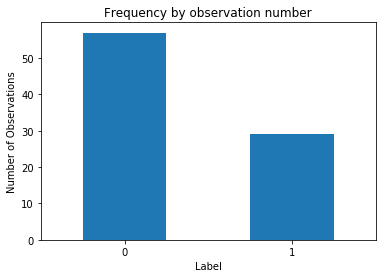

In [13]:
# Count the occurrences of fraud and no fraud cases
fnf = df["label"].value_counts()

# Print the ratio of fraud cases 
print(fnf/len(df))

# Plottingg your data
plt.xlabel("Label")
plt.ylabel("Number of Observations")
fnf.plot(kind = 'bar',title = 'Frequency by observation number',rot=0)

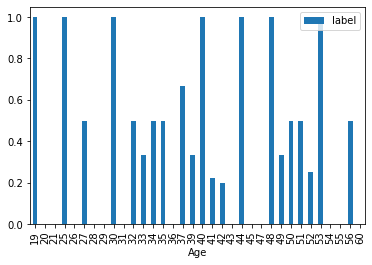

In [14]:
df[['Age', 'label']].groupby(['Age']).mean().plot.bar()

In [15]:
# Seperate total data into non-fraud and fraud cases
df_label = df[df.label == 1] #do the same for frauds

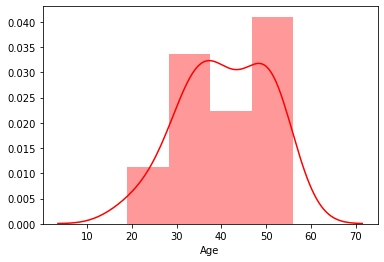

In [16]:
# Plot the distribution of 'unix_time' with fraud record
sns.distplot(df_label['Age'], color='r')
plt.show()

Text(0.5, 1, 'Imbalanced Correlation Matrix')

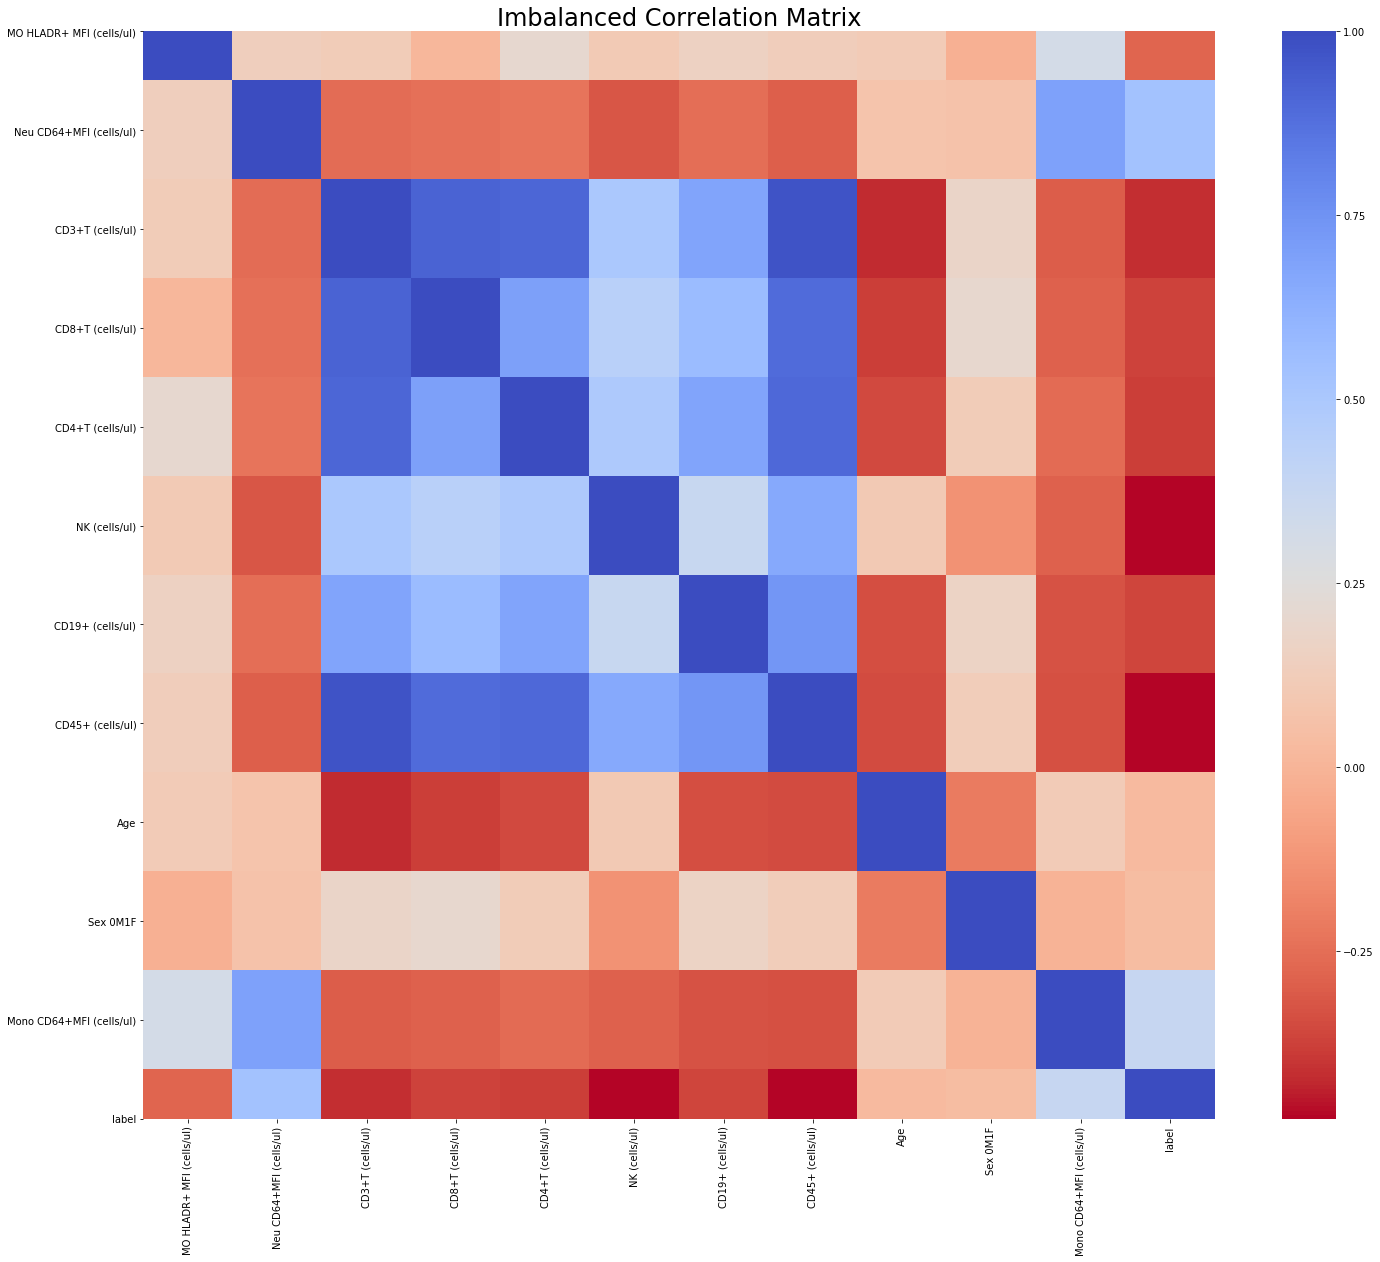

In [17]:
corr = df.corr() 

# Plot heatmap of correlation
f, ax = plt.subplots(1, 1, figsize=(24,20))
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
ax.set_title("Imbalanced Correlation Matrix", fontsize=24)

## Part 3: Dataset Split

In [174]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline # Inorder to avoid testing model on sampled data

In [203]:
# divide into dataset x and y
df_x = df.drop(['label'],axis=1, inplace=False)
X = np.array(df_x).astype(np.float)
df_y = df[['label']]
Y = np.array(df_y).astype(np.float)

In [204]:
df_x

,MO HLADR+ MFI (cells/ul),Neu CD64+MFI (cells/ul),CD3+T (cells/ul),CD8+T (cells/ul),CD4+T (cells/ul),NK (cells/ul),CD19+ (cells/ul),CD45+ (cells/ul),Age,Sex 0M1F,Mono CD64+MFI (cells/ul)
id,,,,,,,,,,,
0,3556.0,2489.0,265.19,77.53,176.55,0.00,4.20,307.91,52,0,7515.0
1,1906.0,134.0,1442.61,551.90,876.07,112.10,168.15,1735.48,20,1,1756.0
2,1586.0,71.0,1332.74,684.20,655.26,244.95,216.52,1820.04,28,1,1311.0
3,683.0,94.0,419.23,255.80,162.17,72.05,44.68,538.22,55,1,1443.0
4,1032.0,71.0,1102.72,480.27,625.30,188.78,130.77,1427.97,28,1,1542.0
...,...,...,...,...,...,...,...,...,...,...,...
82,626.0,68.0,1771.57,666.99,1117.48,360.21,118.84,2306.82,42,1,1521.0
83,1237.0,71.0,1348.53,428.09,924.69,120.02,48.67,1524.78,56,0,1345.0
84,634.0,1002.0,1300.00,558.00,724.00,67.00,105.00,1484.26,34,0,2926.0


In [205]:
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.1, random_state=10)

In [206]:
X_test.shape

(9, 11)

## Part 4: Predict Model Demo

### Evaluation Function

In [180]:
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [181]:
# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('Receiver operating characteristic curve (ROC)')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

### Model1: LogisticRegression

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [207]:
# Fit a logistic regression model to our data
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Obtain model predictions
y_predicted = lr_model.predict(X_test)

In [208]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

# Calculate Area Under the Receiver Operating Characteristic Curve 
probs = lr_model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, probs[:, 1])
print('ROC AUC Score:',roc_auc)

ROC AUC Score: 1.0


Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00         4

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Confusion matrix:
 [[5 0]
 [0 4]]


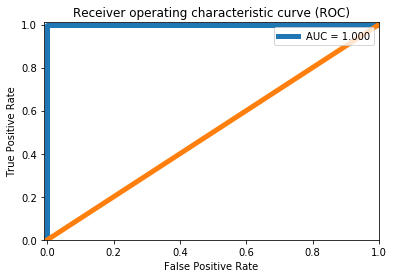

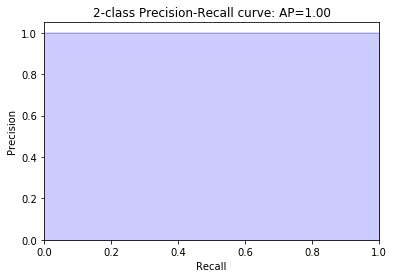

In [209]:
# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(y_test, y_predicted)

# Calculate average precision 
average_precision = average_precision_score(y_test, y_predicted)


# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

### Model2: Decision tree

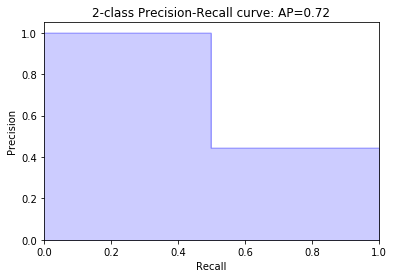

Classification report:
               precision    recall  f1-score   support

         0.0       0.71      1.00      0.83         5
         1.0       1.00      0.50      0.67         4

    accuracy                           0.78         9
   macro avg       0.86      0.75      0.75         9
weighted avg       0.84      0.78      0.76         9

Confusion matrix:
 [[5 0]
 [2 2]]


In [211]:
# Import the decision tree model from sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Fit a logistic regression model to our data
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Obtain model predictions
y_predicted = dt_model.predict(X_test)

# Calculate average precision 
average_precision = average_precision_score(y_test, y_predicted)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, y_predicted)

# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))

### Model 3: Random Forest Classifier (Best model on this dataset)

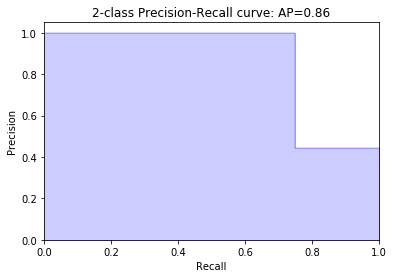

0.8888888888888888
AUC ROC score:  1.0
Classification report:
               precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.75      0.86         4

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9

Confusion matrix:
 [[5 0]
 [1 3]]


In [212]:
# Import the Random Forest Classifier model from sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Fit a logistic regression model to our data
rf_model = RandomForestClassifier(random_state=5)
rf_model.fit(X_train, y_train)

# Obtain model predictions
y_predicted = rf_model.predict(X_test)

# Predict probabilities
probs = rf_model.predict_proba(X_test)

# Calculate average precision 
average_precision = average_precision_score(y_test, y_predicted)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, y_predicted)

# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)

# Print the classifcation report and confusion matrix
print(accuracy_score(y_test, y_predicted))
print("AUC ROC score: ", roc_auc_score(y_test, probs[:,1]))

print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))

### Model4: Lightgbm

In [104]:
import lightgbm as lgb

In [213]:
lgbm_model = lgb.LGBMRegressor(num_iterations=100,
                                learning_rate=0.04,
                                max_depth=5,
                                min_data_in_leaf=15,
                                boosting='gbdt')

In [214]:
lgbm_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50)

[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[1]	valid_0's l2: 0.254234
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l2: 0.247719
[3]	valid_0's l2: 0.241383
[4]	valid_0's l2: 0.235789
[5]	valid_0's l2: 0.230336
[6]	valid_0's l2: 0.22553
[7]	valid_0's l2: 0.220833
[8]	valid_0's l2: 0.216417
[9]	valid_0's l2: 0.212289
[10]	valid_0's l2: 0.208079
[11]	valid_0's l2: 0.204646
[12]	valid_0's l2: 0.198231
[13]	valid_0's l2: 0.195273
[14]	valid_0's l2: 0.189493
[15]	valid_0's l2: 0.186684
[16]	valid_0's l2: 0.18157
[17]	valid_0's l2: 0.179092
[18]	valid_0's l2: 0.174565
[19]	valid_0's l2: 0.172311
[20]	valid_0's l2: 0.168363
[21]	valid_0's l2: 0.164673
[22]	valid_0's l2: 0.162778
[23]	valid_0's l2: 0.159553
[24]	valid_0's l2: 0.157873
[25]	valid_0's l2: 0.154964
[26]	valid_0's l2: 0

LGBMRegressor(boosting='gbdt', learning_rate=0.04, max_depth=5,
              min_data_in_leaf=15, num_iterations=100)

In [215]:
feature_importance = pd.DataFrame({'feature_name': lgbm_model.booster_.feature_name(), 'importance': lgbm_model.booster_.feature_importance(importance_type='split')})

In [216]:
feature_importance

,feature_name,importance
0,Column_0,48
1,Column_1,84
2,Column_2,41
3,Column_3,13
4,Column_4,2
5,Column_5,39
6,Column_6,29
7,Column_7,1
8,Column_8,7
9,Column_9,0


In [217]:
y_predicted_array = lgbm_model.predict(X_test)

In [218]:
y_predicted = []
for num in y_predicted_array:
    if num <= 0.5:
        y_predicted.append(0)
    else:
        y_predicted.append(1)

In [219]:
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))

Classification report:
               precision    recall  f1-score   support

         0.0       0.80      0.80      0.80         5
         1.0       0.75      0.75      0.75         4

    accuracy                           0.78         9
   macro avg       0.78      0.78      0.78         9
weighted avg       0.78      0.78      0.78         9

Confusion matrix:
 [[4 1]
 [1 3]]


### Model5: Deep Learning Model (MLP)

In [220]:
import torchvision
import torch
from torch import nn, optim

In [221]:
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float()

In [222]:
feature_shape = X_train.shape[1]
h = 11
n_out = 1
num_epoch = 500
loss_func = torch.nn.BCEWithLogitsLoss()

In [223]:
# Binary Classifcation
class MLP(torch.nn.Module):
    def __init__(self, n_in, n_hidden, n_out):
        super().__init__()
        self.fc1 = torch.nn.Linear(n_in, n_hidden)
        self.fc2 = torch.nn.Linear(n_hidden, n_out)
    
    def forward(self, x):
        x = self.fc1(x)
        x = torch.nn.functional.relu(x)
        x = self.fc2(x)
        #x = self.sigmoid(x)
        return x

In [224]:
class MLP_2(torch.nn.Module):
    def __init__(self, n_in, n_h1, n_h2, n_out):
        super().__init__()
        self.fc1 = torch.nn.Linear(n_in, n_h1)
        self.fc2 = torch.nn.Linear(n_h1, n_h2)
        self.fc3 = torch.nn.Linear(n_h2, n_out)
        # self.relu = torch.nn.ReLU()
        # self.softmax = torch.nn.softmax
    
    def forward(self, x):
        x = self.fc1(x)
        x = torch.nn.functional.relu(x)
        x = self.fc2(x)
        x = torch.nn.functional.relu(x)
        x = self.fc3(x)
        # x = torch.sigmoid(x)
        return x

In [225]:
def init_single_model(model):
    torch.nn.init.normal_(model.fc1.weight, mean = 0, std = 0.01)
    torch.nn.init.normal_(model.fc2.weight, mean = 0, std = 0.01)
    torch.nn.init.constant_(model.fc1.bias, val = 0)
    torch.nn.init.constant_(model.fc2.bias, val = 0)

In [226]:
def init_mul_model(model):
    torch.nn.init.normal_(model.fc1.weight, mean = 0, std = 0.01)
    torch.nn.init.normal_(model.fc2.weight, mean = 0, std = 0.01)
    torch.nn.init.normal_(model.fc3.weight, mean = 0, std = 0.01)
    torch.nn.init.constant_(model.fc1.bias, val = 0)
    torch.nn.init.constant_(model.fc2.bias, val = 0)
    torch.nn.init.constant_(model.fc3.bias, val = 0)

In [227]:
def MLPTrain(MLP, train_x, train_y, loss_func, optimizer, num_epoch):
    loss_list = []
    for epoch in range(num_epoch):
        train_loss = 0.0
        for i in range(len(train_x)):
            optimizer.zero_grad()
            outs = MLP(train_x[i])
            y = train_y[i]
            #y = torch.unsqueeze(train_y[i],1)
            loss = loss_func(outs, y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()*train_x[i].size(0)
        train_loss = train_loss/len(train_x)
        loss_list.append(train_loss)
        if epoch % 10 == 0:
            print("epoch {}, loss {}".format(epoch, train_loss))
        if (epoch > 0) and (abs(loss_list[epoch - 1] - train_loss) < 0.0001):
            break
    return

In [253]:
def MLPTest(MLP, test_x, test_y, loss_func):
    auc = 0.0
    train_loss = 0.0
    l = 0
    for i in range(len(test_x)):
        l += 1
        predicted = MLP(test_x[i])
        y = test_y[i]
        #y = torch.unsqueeze(test_y[i], 1)
        loss = loss_func(predicted, y)
        train_loss += loss.item() * test_x[i].size(0)
        predicted_ori = torch.sigmoid(predicted)
        predicted = int(predicted_ori[0] >= 0.2)
        auc += int(predicted == test_y[i])
        print(i, "groundtruth:", test_y[i], ", pred:", predicted_ori, ", result:", predicted, predicted == test_y[i])
    print("loss: ", train_loss/l)
    print("auc: ", auc/l)
    return train_loss/l, auc/l

In [273]:
def MLP_Predict(MLP, test_x, loss_func):
    pred_res = []
    for i in range(len(test_x)):
        predicted = MLP(test_x[i])
        predicted = torch.sigmoid(predicted)
        print(i, "predict:", predicted)
        predicted = int(predicted[0] >= 0.2)
        pred_res.append(predicted)
    return pred_res

In [255]:
MLP_model = MLP(feature_shape, h, n_out)
init_single_model(MLP_model)
optimizer = torch.optim.SGD(MLP_model.parameters(), lr=0.000001, momentum=0.9)
MLPTrain(MLP_model, X_train_tensor, y_train_tensor, loss_func, optimizer, num_epoch)

epoch 0, loss 6.414372035435268
epoch 10, loss 4.022256146983376
epoch 20, loss 3.7895968085088367
epoch 30, loss 3.591098793524517
epoch 40, loss 3.440458298218021
epoch 50, loss 3.288854077811785
epoch 60, loss 3.1601382844417976
epoch 70, loss 3.062427012643379
epoch 80, loss 2.975680141028119
epoch 90, loss 2.9157439463562462
epoch 100, loss 2.8650562366850787
epoch 110, loss 2.8207834760474424
epoch 120, loss 2.7826669427966917
epoch 130, loss 2.7501771351553543
epoch 140, loss 2.720698569544116
epoch 150, loss 2.6920638355783404
epoch 160, loss 2.665753273454032
epoch 170, loss 2.640939612206824
epoch 180, loss 2.618645377963763
epoch 190, loss 2.594198085048739
epoch 200, loss 2.573884426929989
epoch 210, loss 2.5548330846024863
epoch 220, loss 2.5285221380954517
epoch 230, loss 2.5155263973603446
epoch 240, loss 2.4966261556393965
epoch 250, loss 2.482652569133083
epoch 260, loss 2.459550002267015
epoch 270, loss 2.4401987076763416
epoch 280, loss 2.4269765712619122
epoch 290, 

In [256]:
test_loss, test_auc = MLPTest(MLP_model, X_test_tensor, y_test_tensor, loss_func)

0 groundtruth: tensor([1.]) , pred: tensor([0.9555], grad_fn=<SigmoidBackward0>) , result: 1 tensor([True])
1 groundtruth: tensor([0.]) , pred: tensor([0.2564], grad_fn=<SigmoidBackward0>) , result: 1 tensor([False])
2 groundtruth: tensor([0.]) , pred: tensor([0.0260], grad_fn=<SigmoidBackward0>) , result: 0 tensor([True])
3 groundtruth: tensor([1.]) , pred: tensor([0.7335], grad_fn=<SigmoidBackward0>) , result: 1 tensor([True])
4 groundtruth: tensor([0.]) , pred: tensor([0.0029], grad_fn=<SigmoidBackward0>) , result: 0 tensor([True])
5 groundtruth: tensor([1.]) , pred: tensor([0.6480], grad_fn=<SigmoidBackward0>) , result: 1 tensor([True])
6 groundtruth: tensor([1.]) , pred: tensor([0.9108], grad_fn=<SigmoidBackward0>) , result: 1 tensor([True])
7 groundtruth: tensor([0.]) , pred: tensor([0.0590], grad_fn=<SigmoidBackward0>) , result: 0 tensor([True])
8 groundtruth: tensor([0.]) , pred: tensor([0.0201], grad_fn=<SigmoidBackward0>) , result: 0 tensor([True])
loss:  1.5758978105150163
a

In [257]:
h1 = 50
h2 = 20

In [258]:
MLP2_model = MLP_2(feature_shape, h1, h2, n_out)
init_mul_model(MLP2_model)
optimizer = torch.optim.SGD(MLP2_model.parameters(), lr=0.00001, momentum=0.9)
MLPTrain(MLP2_model, X_train_tensor, y_train_tensor, loss_func, optimizer, num_epoch)

epoch 0, loss 7.598003106457846
epoch 10, loss 4.491185822657177
epoch 20, loss 3.9939963999204338
epoch 30, loss 3.744359810370952
epoch 40, loss 3.5471666711548875
epoch 50, loss 3.3290205974002935
epoch 60, loss 3.1239469515481426
epoch 70, loss 2.96978506071194
epoch 80, loss 2.8490866712371385
epoch 90, loss 2.7715538680250966
epoch 100, loss 2.6970586311105893
epoch 110, loss 2.627856178635073
epoch 120, loss 2.5643761173998314
epoch 130, loss 2.5083524970432567
epoch 140, loss 2.4527684406569787
epoch 150, loss 2.4035511551176234
epoch 160, loss 2.3555188744894093
epoch 170, loss 2.3135793321861624
epoch 180, loss 2.2748276199665063
epoch 190, loss 2.2328241673779985
epoch 200, loss 2.199020037562142
epoch 210, loss 2.1718765436468974
epoch 220, loss 2.131247079361856
epoch 230, loss 2.070910188277724
epoch 240, loss 2.036236013436727
epoch 250, loss 2.0105416713304294
epoch 260, loss 1.964855512098211
epoch 270, loss 1.9326672962417237
epoch 280, loss 1.8543910535044656
epoch 2

In [259]:
test_loss, test_auc = MLPTest(MLP2_model, X_test_tensor, y_test_tensor, loss_func)

0 groundtruth: tensor([1.]) , pred: tensor([1.0000], grad_fn=<SigmoidBackward0>) , result: 1 tensor([True])
1 groundtruth: tensor([0.]) , pred: tensor([0.7396], grad_fn=<SigmoidBackward0>) , result: 1 tensor([False])
2 groundtruth: tensor([0.]) , pred: tensor([0.0259], grad_fn=<SigmoidBackward0>) , result: 0 tensor([True])
3 groundtruth: tensor([1.]) , pred: tensor([0.9973], grad_fn=<SigmoidBackward0>) , result: 1 tensor([True])
4 groundtruth: tensor([0.]) , pred: tensor([0.1660], grad_fn=<SigmoidBackward0>) , result: 0 tensor([True])
5 groundtruth: tensor([1.]) , pred: tensor([0.9526], grad_fn=<SigmoidBackward0>) , result: 1 tensor([True])
6 groundtruth: tensor([1.]) , pred: tensor([0.9992], grad_fn=<SigmoidBackward0>) , result: 1 tensor([True])
7 groundtruth: tensor([0.]) , pred: tensor([0.0193], grad_fn=<SigmoidBackward0>) , result: 0 tensor([True])
8 groundtruth: tensor([0.]) , pred: tensor([0.0191], grad_fn=<SigmoidBackward0>) , result: 0 tensor([True])
loss:  2.009600442029801
au

### Conclusion: Use MLP model as final prediction model

## Part 5: MLP Model Train and Test

### 5.1 Train model on whole training set

In [346]:
X_train_all = torch.from_numpy(X).float()
y_train_all = torch.from_numpy(Y).float()

In [347]:
h1 = 50
h2 = 25

In [352]:
MLP2_model = MLP_2(feature_shape, h1, h2, n_out)
init_mul_model(MLP2_model)
optimizer = torch.optim.SGD(MLP2_model.parameters(), lr=0.00001, momentum=0.9)
MLPTrain(MLP2_model, X_train_all, y_train_all, loss_func, optimizer, num_epoch)

epoch 0, loss 7.485492566990298
epoch 10, loss 4.551443842759486
epoch 20, loss 3.922365590564495
epoch 30, loss 3.573998189470352
epoch 40, loss 3.244958813136733
epoch 50, loss 2.957779707972783
epoch 60, loss 2.7865494006622966
epoch 70, loss 2.6997661999984213
epoch 80, loss 2.639451269063989
epoch 90, loss 2.5926632206312874
epoch 100, loss 2.560887492216458
epoch 110, loss 2.533913954224181
epoch 120, loss 2.5049976678418964
epoch 130, loss 2.4851354602768665


In [353]:
test_loss, test_auc = MLPTest(MLP2_model, X_train_all, y_train_all, loss_func)

0 groundtruth: tensor([1.]) , pred: tensor([1.], grad_fn=<SigmoidBackward0>) , result: 1 tensor([True])
1 groundtruth: tensor([0.]) , pred: tensor([0.0330], grad_fn=<SigmoidBackward0>) , result: 0 tensor([True])
2 groundtruth: tensor([0.]) , pred: tensor([0.0029], grad_fn=<SigmoidBackward0>) , result: 0 tensor([True])
3 groundtruth: tensor([0.]) , pred: tensor([0.1557], grad_fn=<SigmoidBackward0>) , result: 0 tensor([True])
4 groundtruth: tensor([0.]) , pred: tensor([0.0207], grad_fn=<SigmoidBackward0>) , result: 0 tensor([True])
5 groundtruth: tensor([1.]) , pred: tensor([0.1077], grad_fn=<SigmoidBackward0>) , result: 0 tensor([False])
6 groundtruth: tensor([0.]) , pred: tensor([0.0032], grad_fn=<SigmoidBackward0>) , result: 0 tensor([True])
7 groundtruth: tensor([0.]) , pred: tensor([0.0122], grad_fn=<SigmoidBackward0>) , result: 0 tensor([True])
8 groundtruth: tensor([0.]) , pred: tensor([0.0020], grad_fn=<SigmoidBackward0>) , result: 0 tensor([True])
9 groundtruth: tensor([0.]) , p

### 5.2 Generate testset prediction

In [354]:
df_test = pd.read_csv("data/test.csv", index_col=0)

In [302]:
df_test

,MO HLADR+ MFI (cells/ul),Neu CD64+MFI (cells/ul),CD3+T (cells/ul),CD8+T (cells/ul),CD4+T (cells/ul),NK (cells/ul),CD19+ (cells/ul),CD45+ (cells/ul),Age,Sex 0M1F,Mono CD64+MFI (cells/ul),label
id,,,,,,,,,,,,
0,2843.0,156.0,1358.52,730.78,637.85,127.06,94.82,1588.62,45,1,3256.0,0
1,437.0,137.0,509.43,268.05,243.07,390.86,98.24,1002.76,51,1,491.0,0
2,826.0,82.0,1232.22,493.42,744.08,516.28,320.15,2200.58,32,0,1381.0,0
3,861.0,50.0,1512.86,925.51,590.07,380.25,25.80,1929.10,50,0,1377.0,0
4,1160.0,157.0,890.42,403.91,489.53,266.92,87.63,1251.52,43,0,1844.0,0
5,867.0,85.0,1662.11,865.50,804.14,220.68,92.58,2063.11,44,1,986.0,0
6,1330.0,114.0,1307.95,710.86,607.96,271.01,214.49,1855.05,31,0,2077.0,0
7,494.0,48.0,1522.39,618.19,911.49,338.85,104.45,2013.05,36,1,1409.0,0
8,2119.0,73.0,1219.66,732.14,468.48,71.54,83.08,1378.32,45,1,2403.0,0


In [356]:
# handle special cases -> 1
sp_cases = df_test[(df_test["Neu CD64+MFI (cells/ul)"] > 100) & (df_test["Neu CD64+MFI (cells/ul)"] < 160) & (df_test["CD3+T (cells/ul)"] > 850) & (df_test["NK (cells/ul)"] < 400) & (df_test["CD19+ (cells/ul)"] < 150) & (df_test["Mono CD64+MFI (cells/ul)"] < 1900)]
sp_cases

,MO HLADR+ MFI (cells/ul),Neu CD64+MFI (cells/ul),CD3+T (cells/ul),CD8+T (cells/ul),CD4+T (cells/ul),NK (cells/ul),CD19+ (cells/ul),CD45+ (cells/ul),Age,Sex 0M1F,Mono CD64+MFI (cells/ul)
id,,,,,,,,,,,
4,1160.0,157.0,890.42,403.91,489.53,266.92,87.63,1251.52,43,0,1844.0


In [364]:
sp_list = sp_cases.index.tolist()

In [359]:
testset = np.array(df_test).astype(np.float)
testset_tensor = torch.from_numpy(testset).float()

In [360]:
res = MLP_Predict(MLP2_model, testset_tensor, loss_func)

0 predict: tensor([0.0032], grad_fn=<SigmoidBackward0>)
1 predict: tensor([0.0742], grad_fn=<SigmoidBackward0>)
2 predict: tensor([0.0020], grad_fn=<SigmoidBackward0>)
3 predict: tensor([0.0076], grad_fn=<SigmoidBackward0>)
4 predict: tensor([0.0317], grad_fn=<SigmoidBackward0>)
5 predict: tensor([0.0619], grad_fn=<SigmoidBackward0>)
6 predict: tensor([0.0017], grad_fn=<SigmoidBackward0>)
7 predict: tensor([0.0463], grad_fn=<SigmoidBackward0>)
8 predict: tensor([0.0041], grad_fn=<SigmoidBackward0>)
9 predict: tensor([0.0008], grad_fn=<SigmoidBackward0>)
10 predict: tensor([0.0006], grad_fn=<SigmoidBackward0>)
11 predict: tensor([0.9997], grad_fn=<SigmoidBackward0>)
12 predict: tensor([0.1352], grad_fn=<SigmoidBackward0>)
13 predict: tensor([0.0017], grad_fn=<SigmoidBackward0>)
14 predict: tensor([0.0054], grad_fn=<SigmoidBackward0>)
15 predict: tensor([0.0652], grad_fn=<SigmoidBackward0>)
16 predict: tensor([0.0003], grad_fn=<SigmoidBackward0>)
17 predict: tensor([0.1664], grad_fn=<Sig

## Part 6: Generate Submission

In [367]:
df_sub = pd.read_csv("data/sample_submission.csv")

In [365]:
for idx in sp_list:
    res[idx] = 1

In [368]:
df_sub["label"] = res

In [370]:
df_sub.head()

,id,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,1


In [371]:
df_sub.to_csv("submission.csv", index = None)

## Other: Ensemble Prediction (NOT used)

In [146]:
y_test

array([[1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.]])

In [147]:
mlp_res = MLP_Predict(MLP_model, X_test_tensor, loss_func)
mlp_res

[1, 0, 0, 1, 0, 1, 1, 0, 0]

In [148]:
mlp2_res = MLP_Predict(MLP2_model, X_test_tensor, loss_func)
mlp2_res

[1, 0, 0, 1, 0, 1, 1, 0, 0]

In [149]:
lgbm_res_float = lgbm_model.predict(X_test)
lgbm_res = []
for num in lgbm_res_float:
    if num <= 0.5:
        lgbm_res.append(0)
    else:
        lgbm_res.append(1)
lgbm_res

[1, 0, 0, 1, 0, 0, 1, 0, 0]

In [150]:
rf_res_np = rf_model.predict(X_test)
rf_res_list = rf_res_np.tolist()
rf_res = []
for num in rf_res_list:
    rf_res.append(int(num))
rf_res

[1, 0, 0, 1, 0, 0, 1, 0, 0]

In [151]:
dt_res_np = dt_model.predict(X_test)
dt_res_list = dt_res_np.tolist()
dt_res = []
for num in dt_res_list:
    dt_res.append(int(num))
dt_res

[1, 1, 0, 0, 0, 0, 1, 0, 0]

In [152]:
lr_res_np = lr_model.predict(X_test)
lr_res_list = lr_res_np.tolist()
lr_res = []
for num in lr_res_list:
    lr_res.append(int(num))
lr_res

[1, 0, 0, 1, 0, 1, 1, 0, 0]

In [153]:
lr_model.fit(X_train_all, y_train_all)
lr_res_all = lr_model.predict(X_train_all)
print('Classification report:\n', classification_report(y_train_all, lr_res_all))
print('Confusion matrix:\n',confusion_matrix(y_true = y_train_all, y_pred = lr_res_all))

Classification report:
               precision    recall  f1-score   support

         0.0       0.92      0.96      0.94        57
         1.0       0.92      0.83      0.87        29

    accuracy                           0.92        86
   macro avg       0.92      0.90      0.91        86
weighted avg       0.92      0.92      0.92        86

Confusion matrix:
 [[55  2]
 [ 5 24]]


In [303]:
rf_model.fit(X_train_all, y_train_all)
lr_res_all = rf_model.predict(X_train_all)
print('Classification report:\n', classification_report(y_train_all, lr_res_all))
print('Confusion matrix:\n',confusion_matrix(y_true = y_train_all, y_pred = lr_res_all))

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        57
         1.0       1.00      1.00      1.00        29

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86

Confusion matrix:
 [[57  0]
 [ 0 29]]


In [304]:
lr_res = rf_model.predict(testset)

In [308]:
lr_res = lr_res.astype(int)

In [156]:
final_res = []
for i in range(len(mlp_res)):
    pred_i = (lr_res[i] + dt_res[i] + rf_res[i] + lgbm_res[i] + mlp_res[i] + mlp2_res[i])/6
    final_res.append(pred_i)
print(final_res)

[1.0, 0.16666666666666666, 0.0, 0.8333333333333334, 0.0, 0.5, 1.0, 0.0, 0.0]
